**Bank Marketing Data various analysis**

# Import Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step:1 Read Data

In [4]:
bank_df=pd.read_csv(r"C:\Users\raj\Documents\Naresh It\bank-additional.csv",sep=';')
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


# Step:2 Data Quick Checks

In [5]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bank_df.shape

(4119, 21)

In [8]:
bank_df.size

86499

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

# Step:3 Handling Missing Values

In [10]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Step:4 Convert Categorical Columns

In [11]:
dtypes=bank_df.dtypes
dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [12]:
cat_cols=[key for key, value in dtypes.items() if value=='object']
num_cols=[key for key, value in dtypes.items() if value!='object']
cat_cols,num_cols

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'],
 ['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'])

In [13]:
categorical_cols = bank_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [14]:
numerical_cols = bank_df.select_dtypes(include=['number']).columns
numerical_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

# Step:5 Categorical Data Analysis

In [15]:
bank_df['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [16]:
bank_df['job'].nunique()

12

In [17]:
bank_df['job'].value_counts()

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64

<Axes: xlabel='job'>

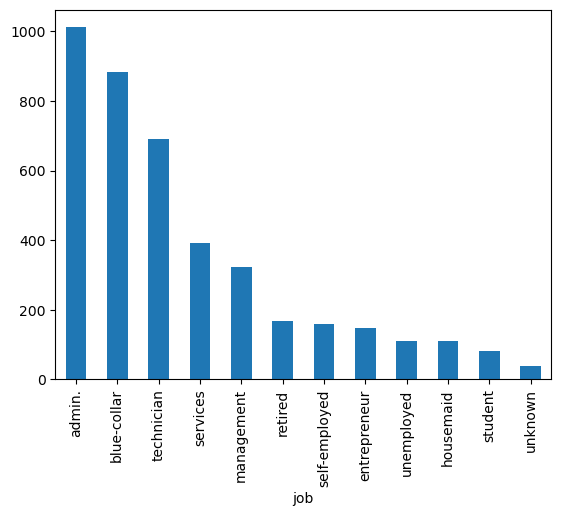

In [18]:
bank_df['job'].value_counts().plot(kind='bar')

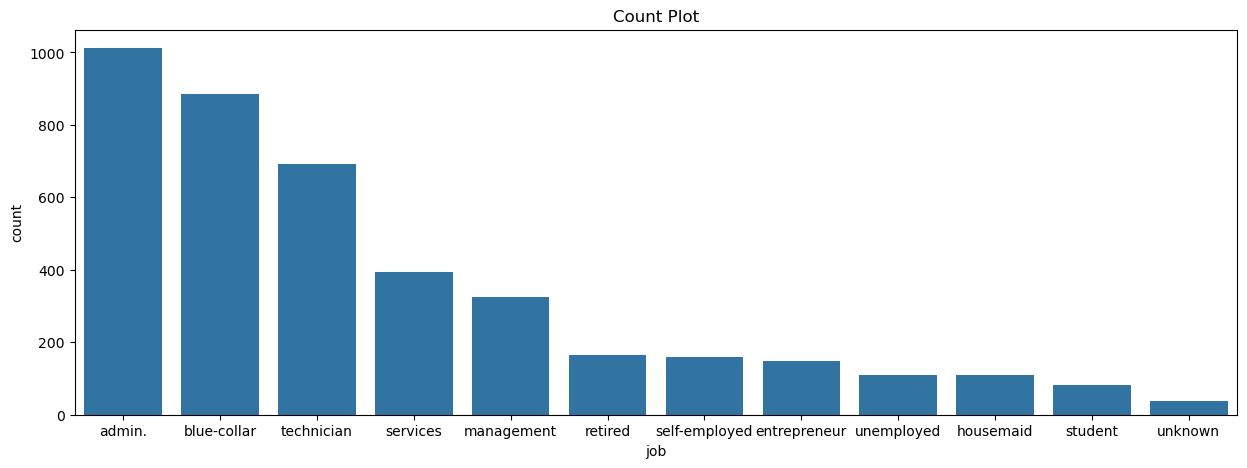

In [19]:
jdf=bank_df['job'].value_counts()
jdf.keys()
plt.figure(figsize=(15,5))
adf=bank_df['age'].value_counts()
keys=jdf.keys()
sns.countplot(data=bank_df,
              x='job',
               order=keys)
plt.title("Count Plot")
plt.xlabel("job")
plt.ylabel("count")
plt.show()

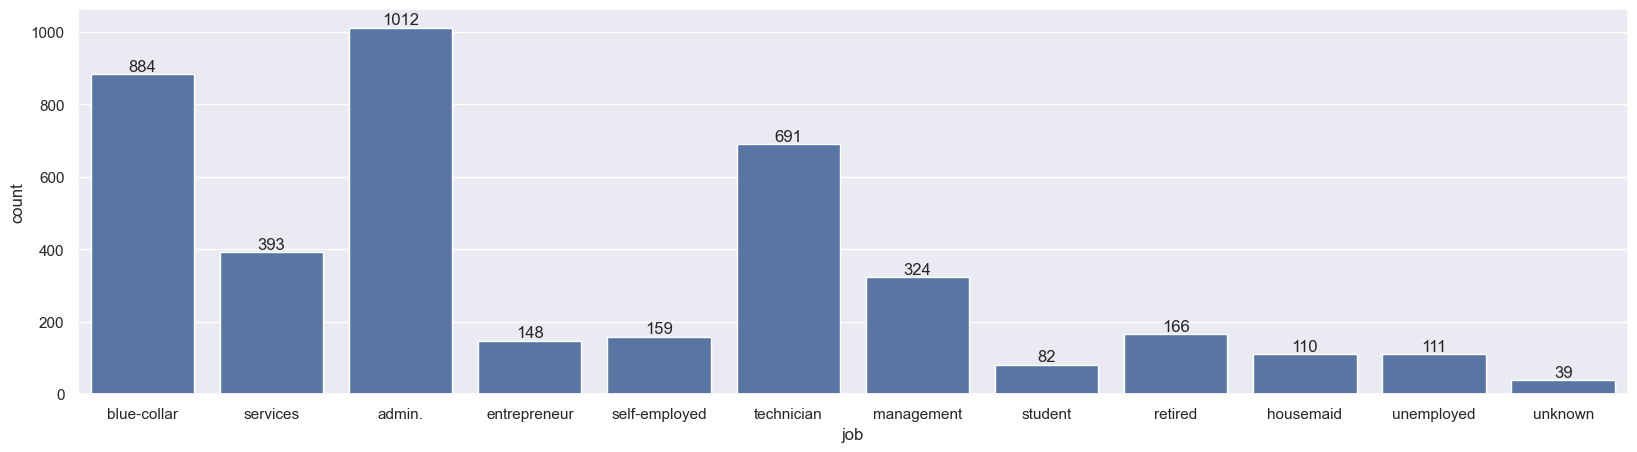

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = bank_df, x = 'job')

for bars in ax.containers:
    ax.bar_label(bars)

In [21]:
import matplotlib.pyplot as plt
jdf=bank_df['job'].value_counts()
keys=jdf.keys()
values=jdf.values
keys,values

(Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
        'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
        'student', 'unknown'],
       dtype='object', name='job'),
 array([1012,  884,  691,  393,  324,  166,  159,  148,  111,  110,   82,
          39], dtype=int64))

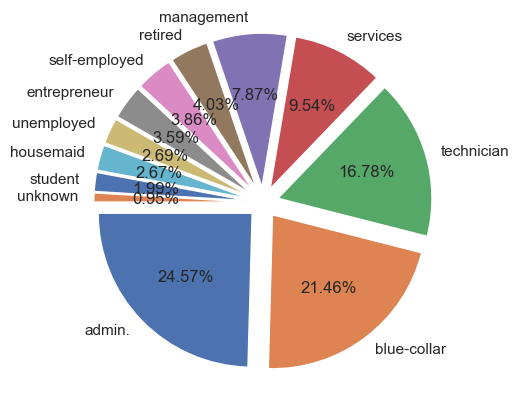

In [22]:
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        labels=keys,
        autopct="%0.2f%%",
        startangle=180,
        radius=1)
plt.show()

# bank_df['marital']

In [23]:
bank_df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [24]:
bank_df['marital'].nunique()

4

In [25]:
bank_df['marital'].value_counts()

marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64

<Axes: xlabel='marital'>

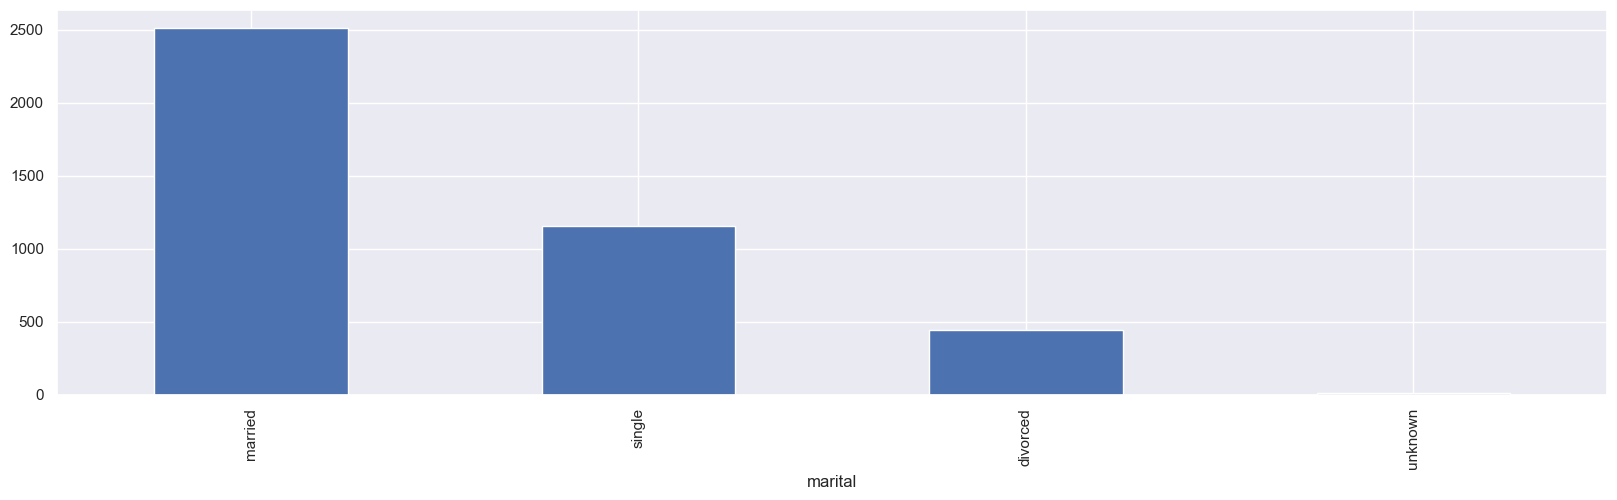

In [26]:
bank_df['marital'].value_counts().plot(kind='bar')

<Axes: xlabel='marital', ylabel='count'>

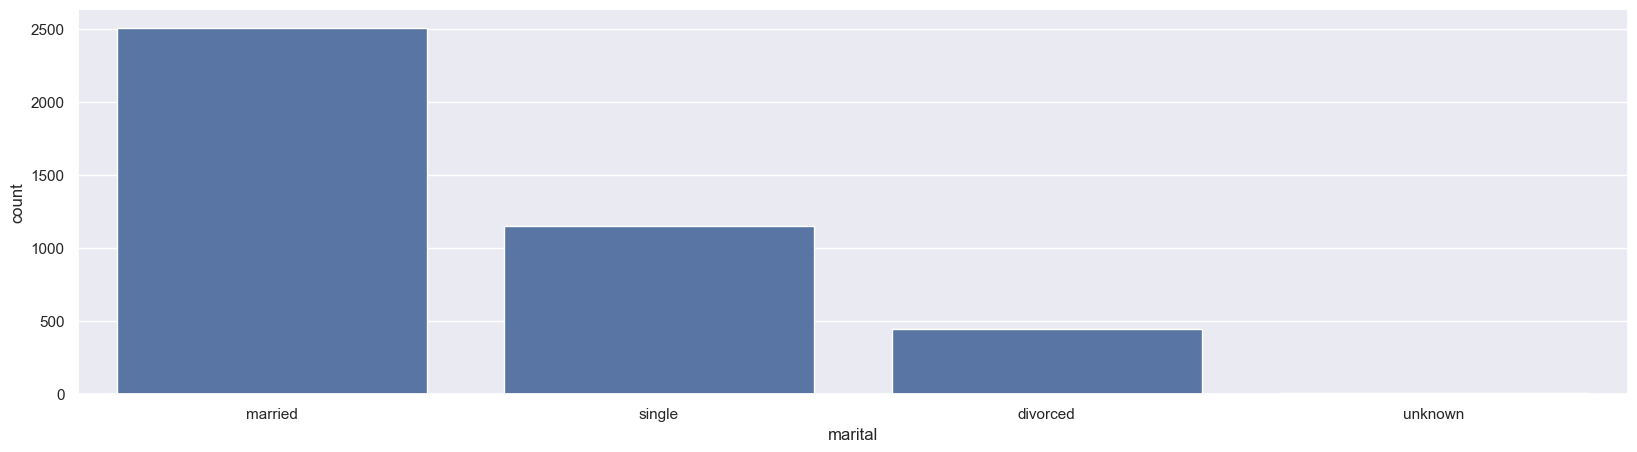

In [27]:
sns.countplot(x='marital', data=bank_df)

In [28]:
import matplotlib.pyplot as plt
mdf=bank_df['marital'].value_counts()
keys=mdf.keys()
values=mdf.values
keys,values

(Index(['married', 'single', 'divorced', 'unknown'], dtype='object', name='marital'),
 array([2509, 1153,  446,   11], dtype=int64))

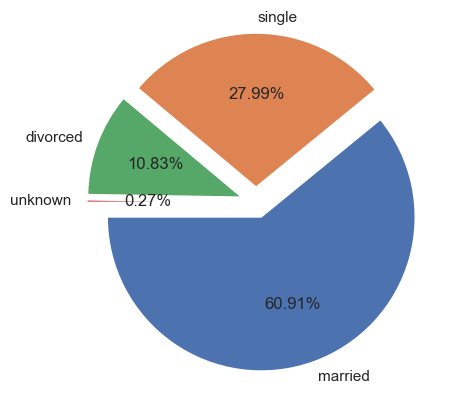

In [29]:
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1],
        labels=keys,
        autopct="%0.2f%%",
        startangle=180,
        radius=1)
plt.show()

# bank_df['education']

In [30]:
bank_df['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [31]:
bank_df['education'].nunique()

8

In [32]:
bank_df['education'].value_counts()

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

<Axes: xlabel='education'>

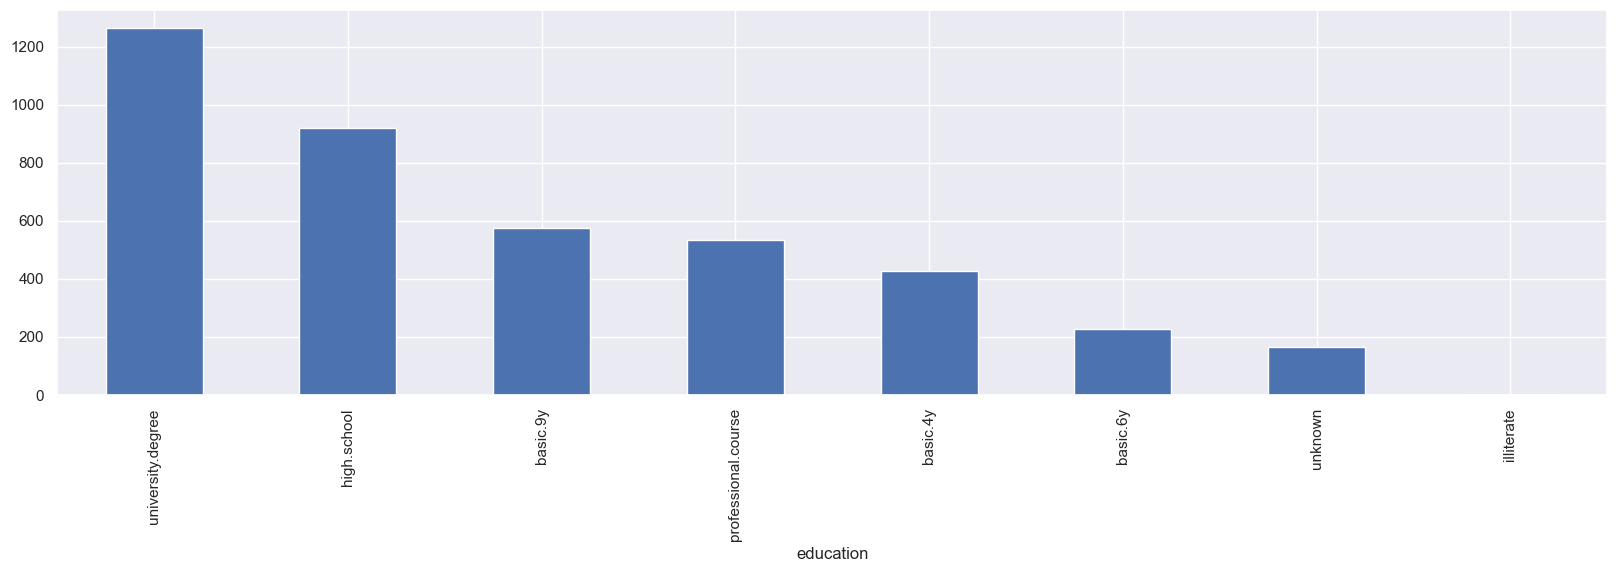

In [33]:
bank_df['education'].value_counts().plot(kind='bar')


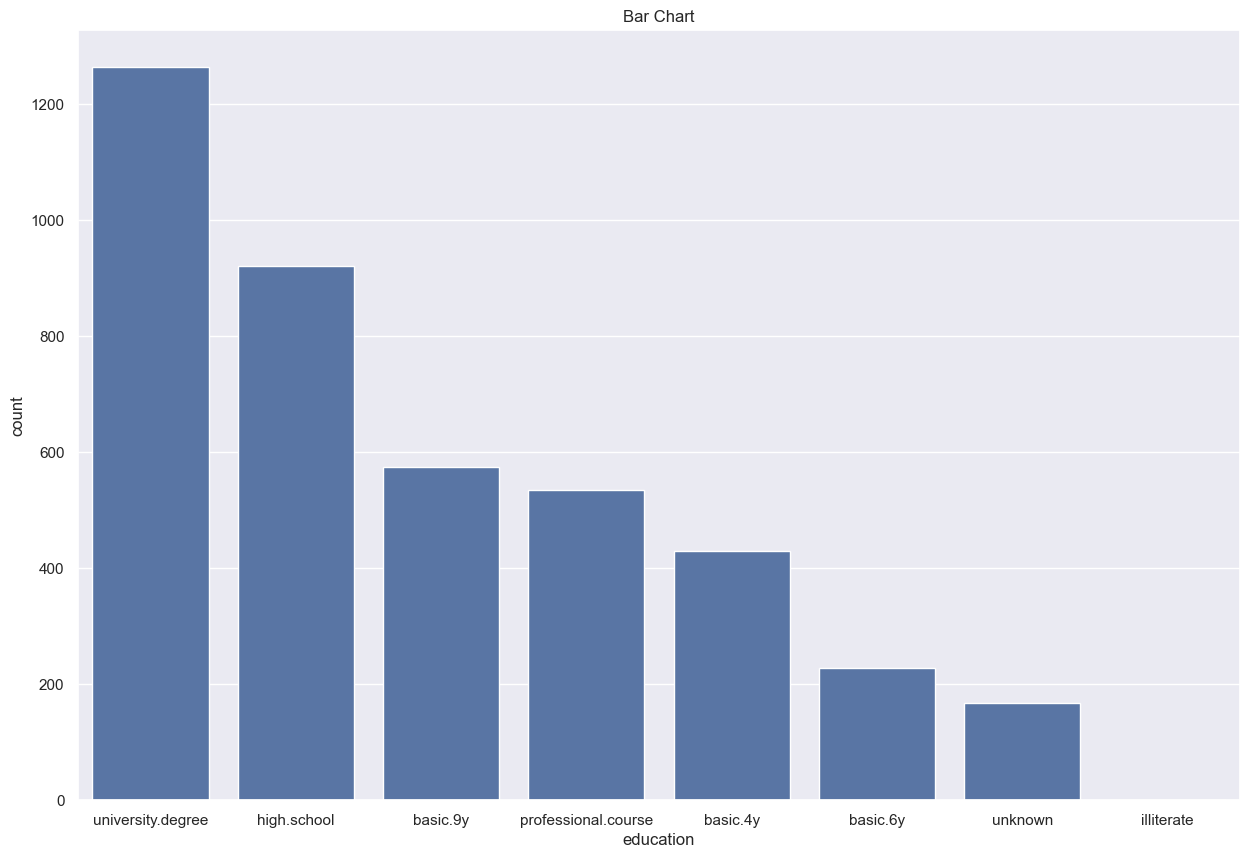

In [34]:
plt.figure(figsize=(15,10))
edf=bank_df['education'].value_counts()
keys=edf.keys()
sns.countplot(data=bank_df,
              x='education',
               order=keys)
plt.title("Bar Chart")
plt.xlabel("education")
plt.ylabel("count")
plt.show()

In [35]:
import matplotlib.pyplot as plt
edf=bank_df['education'].value_counts()
keys=edf.keys()
values=edf.values
keys,values

(Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
        'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
       dtype='object', name='education'),
 array([1264,  921,  574,  535,  429,  228,  167,    1], dtype=int64))

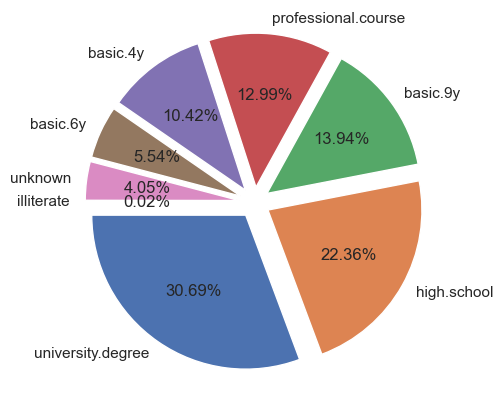

In [36]:
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        labels=keys,
        autopct="%0.2f%%",
        startangle=180,
        radius=1)
plt.show()

In [37]:
bank_df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [38]:
bank_df['default'].nunique()

3

In [39]:
bank_df['default'].value_counts()

default
no         3315
unknown     803
yes           1
Name: count, dtype: int64

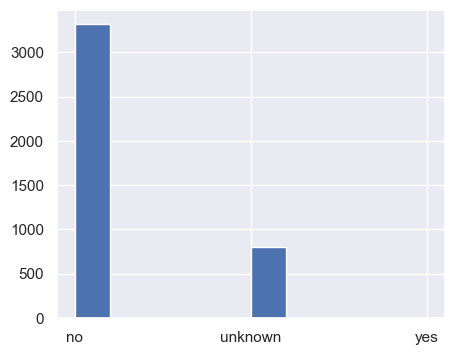

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.hist(bank_df['default'])
plt.show()

In [41]:
bank_df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [42]:
bank_df['housing'].nunique()

3

In [43]:
bank_df['housing'].value_counts()

housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64

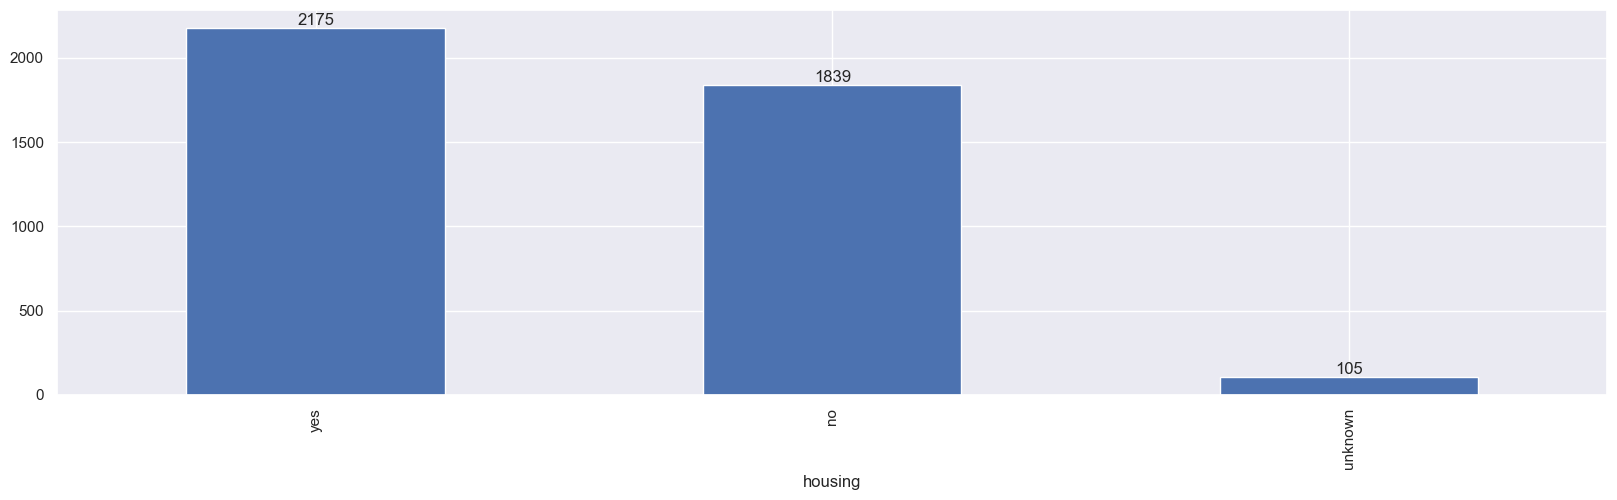

In [44]:
import matplotlib.pyplot as plt
hdf=bank_df['housing'].value_counts()
ax=hdf.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='housing', ylabel='count'>

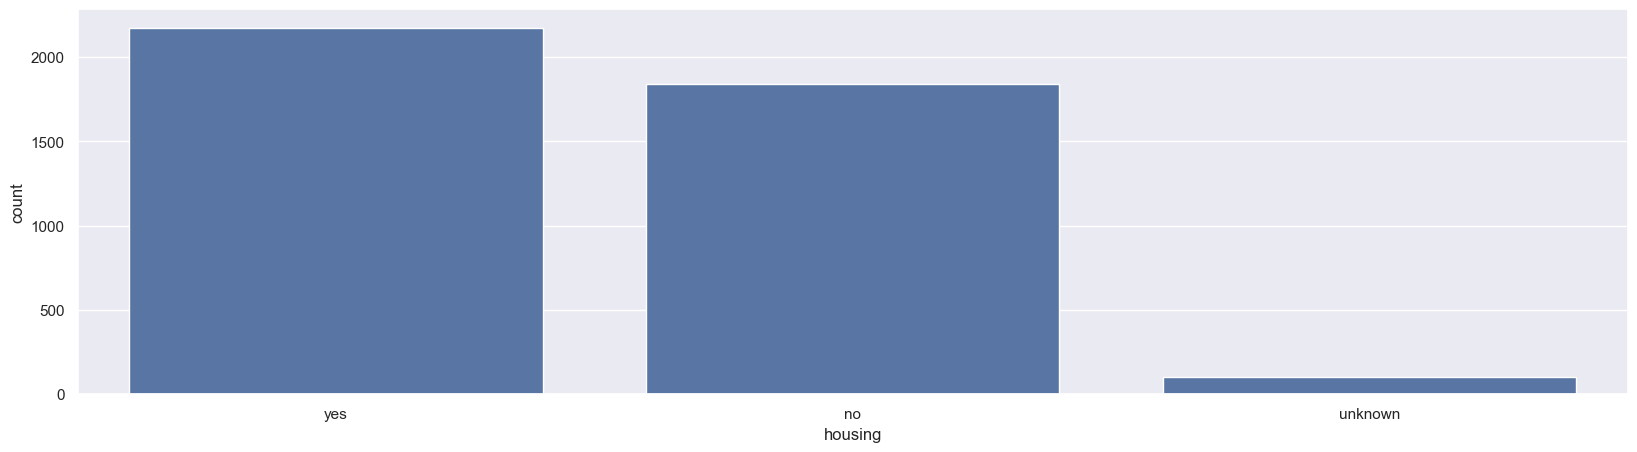

In [45]:
sns.countplot(x='housing', data=bank_df)

In [46]:
hdf=bank_df['housing'].value_counts()
keys=hdf.keys()
values=hdf.values
keys,values

(Index(['yes', 'no', 'unknown'], dtype='object', name='housing'),
 array([2175, 1839,  105], dtype=int64))

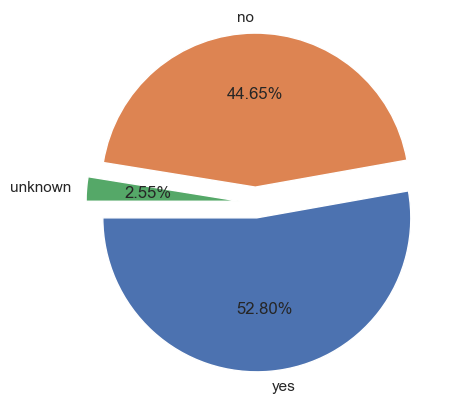

In [47]:

plt.pie(values,
 explode=[0.1,0.1,0.1],
 labels=keys,
 autopct="%0.2f%%",
 startangle=180,
 radius=1)
plt.show()


# bank_df['loan']

In [48]:
bank_df['loan'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [49]:
bank_df['loan'].nunique()

3

In [50]:
bank_df['loan'].value_counts()

loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64

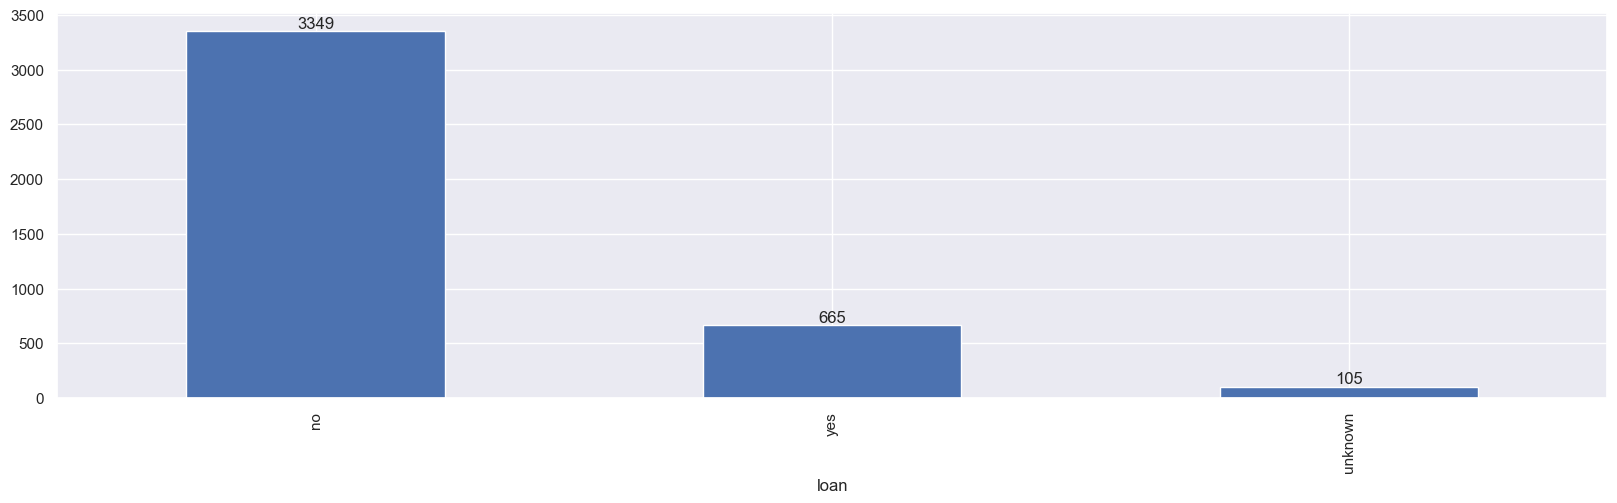

In [51]:
ldf=bank_df['loan'].value_counts()
ax=ldf.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()


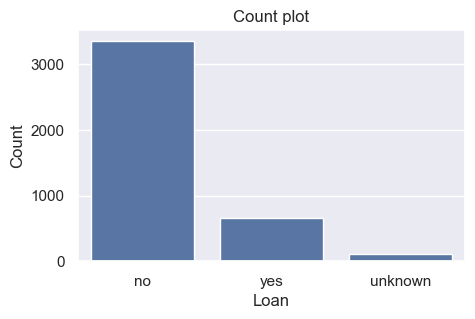

In [52]:
ldf=bank_df['loan'].value_counts()
keys=ldf.keys()
plt.figure(figsize=(5,3))
sns.countplot(data=bank_df,
 x='loan',
 order=keys)
plt.title('Count plot') 
plt.xlabel("Loan") 
plt.ylabel("Count")
plt.show()


In [53]:
ldf=bank_df['loan'].value_counts()
keys=ldf.keys()
values=ldf.values
keys,values


(Index(['no', 'yes', 'unknown'], dtype='object', name='loan'),
 array([3349,  665,  105], dtype=int64))

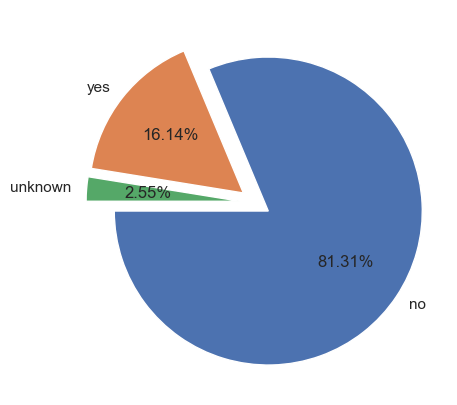

In [54]:

plt.pie(values,
 explode=[0.1,0.1,0.1],
 labels=keys,
 autopct="%0.2f%%",
 startangle=180,
 radius=1)
plt.show()


In [55]:
bank_df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [56]:
bank_df['contact'].nunique()

2

In [57]:
bank_df['contact'].value_counts()

contact
cellular     2652
telephone    1467
Name: count, dtype: int64

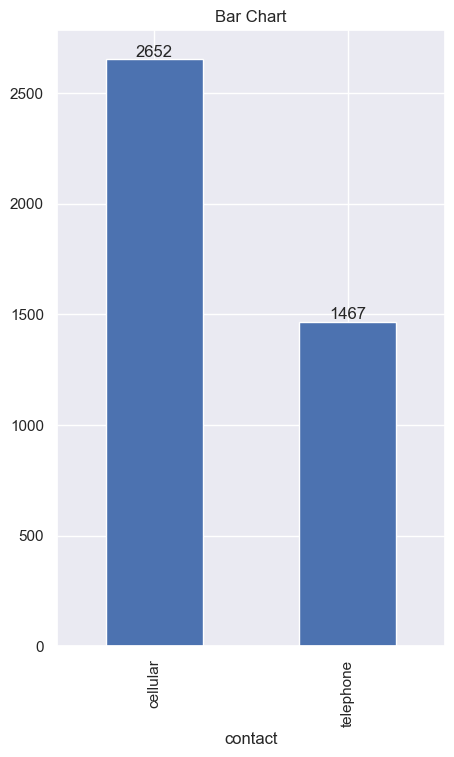

In [58]:
plt.figure(figsize=(5,8))
plt.title("Bar Chart")
cdf=bank_df['contact'].value_counts()
ax=cdf.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

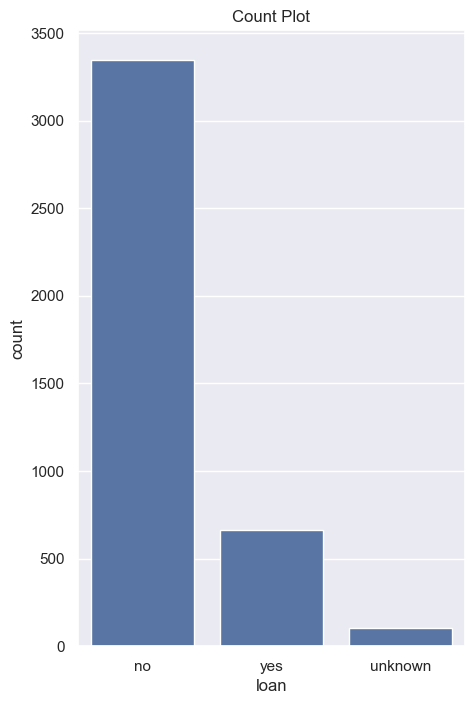

In [59]:
plt.figure(figsize=(5,8))
plt.title("Count Plot")
cdf=bank_df['contact'].value_counts()
keys=ldf.keys()
sns.countplot(data=bank_df,
 x='loan',
 order=keys)
plt.show()

In [60]:
cdf=bank_df['contact'].value_counts()
keys=cdf.keys()
values=cdf.values
keys,values

(Index(['cellular', 'telephone'], dtype='object', name='contact'),
 array([2652, 1467], dtype=int64))

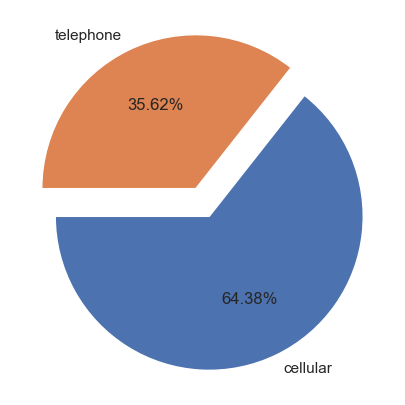

In [61]:

plt.pie(values,
 explode=[0.1,0.1],
 labels=keys,
 autopct="%0.2f%%",
 startangle=180,
 radius=1)
plt.show()


In [62]:
bank_df['month'].unique()

array(['may', 'jun', 'nov', 'sep', 'jul', 'aug', 'mar', 'oct', 'apr',
       'dec'], dtype=object)

In [63]:
bank_df['month'].nunique()

10

In [64]:
bank_df['month'].value_counts()

month
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: count, dtype: int64

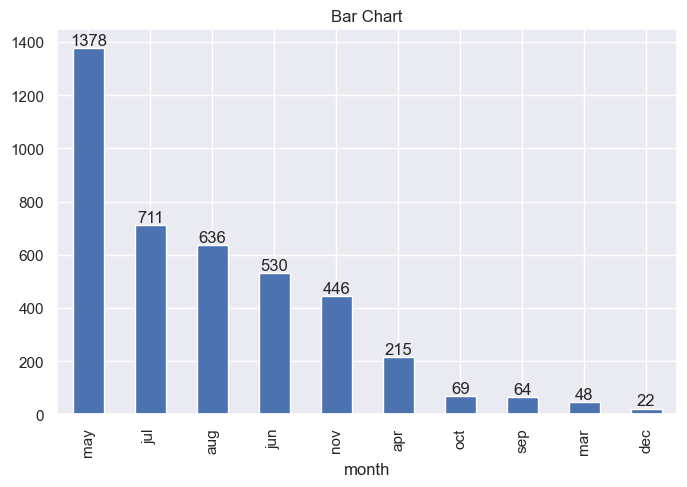

In [65]:
plt.figure(figsize=(8,5))
plt.title("Bar Chart")
mdf=bank_df['month'].value_counts()
ax=mdf.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

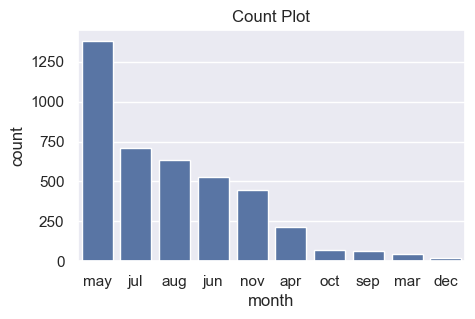

In [66]:
plt.figure(figsize=(5,3))
plt.title("Count Plot")
mdf=bank_df['month'].value_counts()
keys=mdf.keys()
sns.countplot(data=bank_df,
 x='month',
 order=keys)
plt.show()

In [67]:
mdf=bank_df['month'].value_counts()
keys=mdf.keys()
values=mdf.values
keys,values

(Index(['may', 'jul', 'aug', 'jun', 'nov', 'apr', 'oct', 'sep', 'mar', 'dec'], dtype='object', name='month'),
 array([1378,  711,  636,  530,  446,  215,   69,   64,   48,   22],
       dtype=int64))

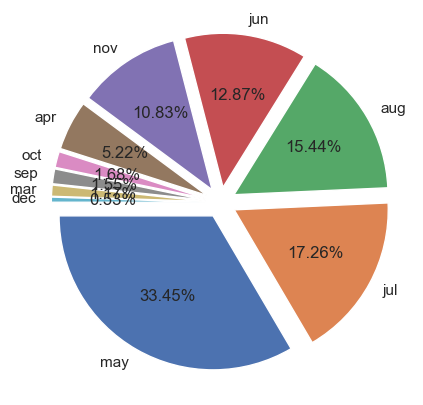

In [68]:
plt.figure(figsize=(8,5))
plt.pie(values,
 explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
 labels=keys,
 autopct="%0.2f%%",
 startangle=180,
 radius=1)
plt.show()

In [69]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [70]:
bank_df['day_of_week'].unique()

array(['fri', 'wed', 'mon', 'thu', 'tue'], dtype=object)

In [71]:
bank_df['day_of_week'].nunique()

5

In [72]:
bank_df['day_of_week'].value_counts()

day_of_week
thu    860
mon    855
tue    841
wed    795
fri    768
Name: count, dtype: int64

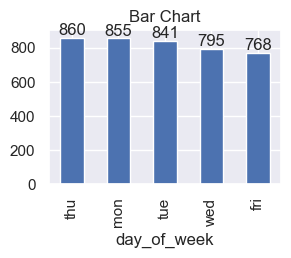

In [73]:
plt.figure(figsize=(3,2))
plt.title("Bar Chart")
day_df=bank_df['day_of_week'].value_counts()
ax=day_df.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

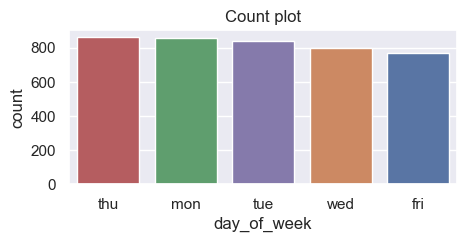

In [74]:
plt.figure(figsize=(5,2))
plt.title("Count plot")
day_df=bank_df['day_of_week'].value_counts()
keys=day_df.keys()
sns.countplot(data=bank_df,
              x='day_of_week',
              order=keys,hue='day_of_week')
plt.show()

In [75]:
keys=day_df.keys()
values=day_df.values
keys,values

(Index(['thu', 'mon', 'tue', 'wed', 'fri'], dtype='object', name='day_of_week'),
 array([860, 855, 841, 795, 768], dtype=int64))

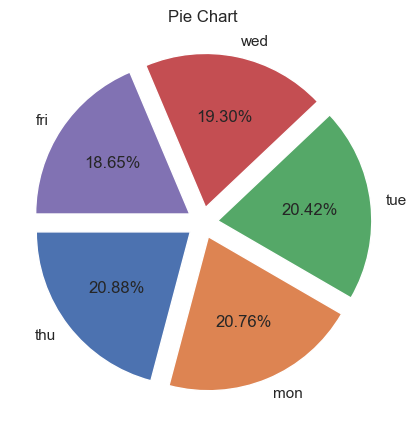

In [76]:
plt.figure(figsize=(9,5))
plt.title("Pie Chart")
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1,0.1],
        labels=keys,
        autopct="%0.2f%%",
        startangle=180,
        radius=1)
plt.show()

In [77]:
bank_df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [78]:
bank_df['poutcome'].nunique()

3

In [79]:
bank_df['poutcome'].value_counts()

poutcome
nonexistent    3523
failure         454
success         142
Name: count, dtype: int64

In [80]:
outcome_df=bank_df['poutcome'].value_counts()
keys=outcome_df.keys()
values=outcome_df.values
keys,values

(Index(['nonexistent', 'failure', 'success'], dtype='object', name='poutcome'),
 array([3523,  454,  142], dtype=int64))

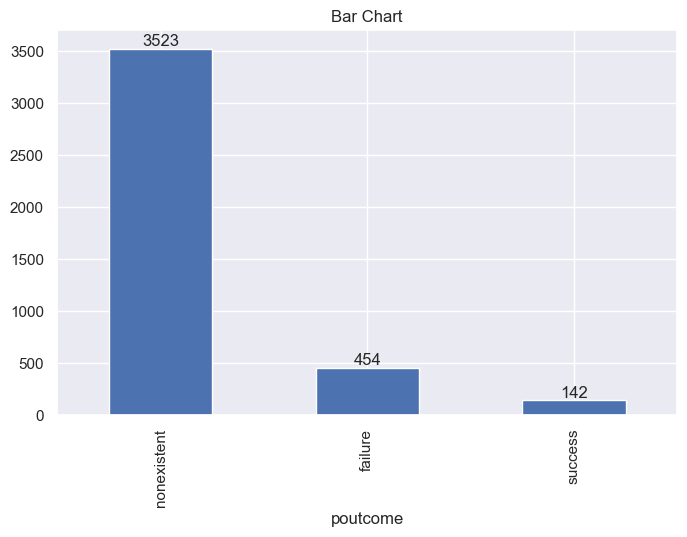

In [81]:
plt.figure(figsize=(8,5))
plt.title("Bar Chart")
ax=outcome_df.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

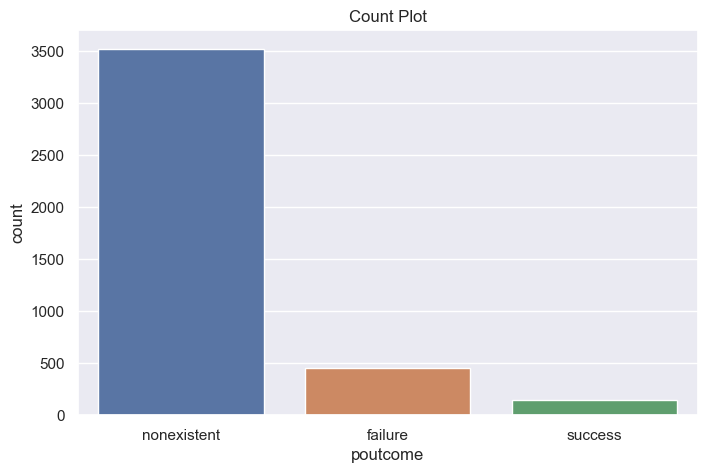

In [82]:
plt.figure(figsize=(8,5))
plt.title("Count Plot")
sns.countplot(data=bank_df,
              x='poutcome',
              order=keys, hue='poutcome')

plt.show()

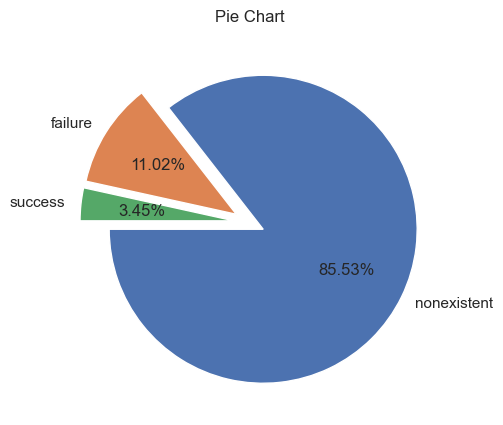

In [83]:
plt.figure(figsize=(8,5))
plt.title("Pie Chart")
plt.pie(values,
       explode=[0.1,0.1,0.1],
       labels=keys,
       autopct="%0.2f%%",
        startangle=180,
        radius=1)
plt.show()

In [84]:
bank_df['y'].unique()

array(['no', 'yes'], dtype=object)

In [85]:
bank_df['y'].nunique()

2

In [86]:
bank_df['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [87]:
ydf=bank_df['y'].value_counts()
keys=ydf.keys()
values=ydf.values
keys,values


(Index(['no', 'yes'], dtype='object', name='y'),
 array([3668,  451], dtype=int64))

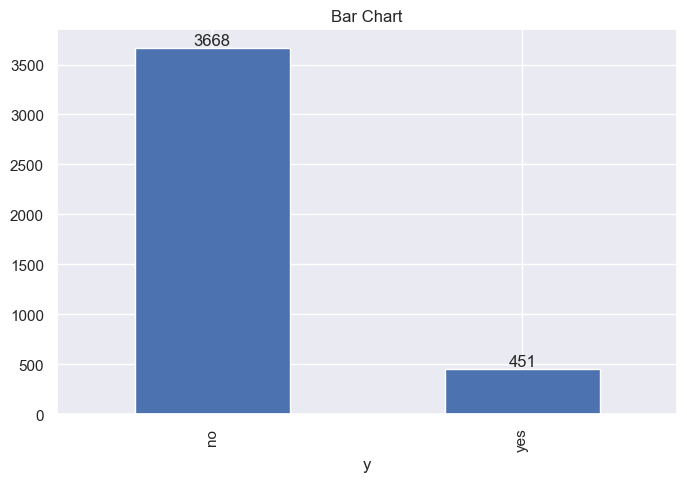

In [88]:
plt.figure(figsize=(8,5))
plt.title("Bar Chart")
ax=ydf.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

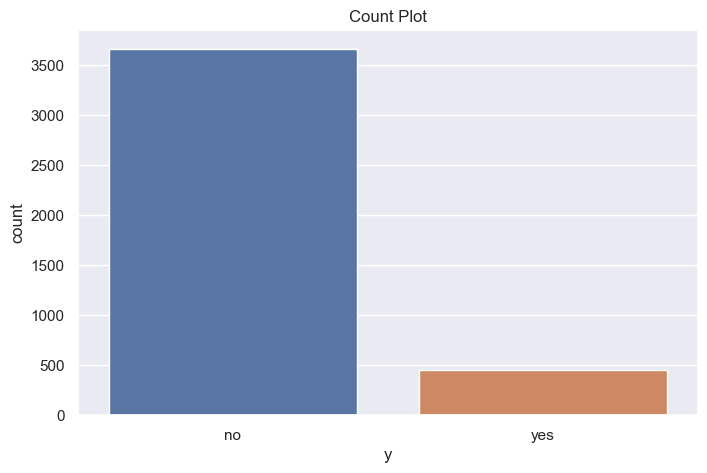

In [89]:
plt.figure(figsize=(8,5))
plt.title("Count Plot")
sns.countplot(data=bank_df,
              x='y',
             order=keys, hue='y')
plt.show()

([<matplotlib.patches.Wedge at 0x20319721350>,
 [Text(1.1297034438878366, -0.4046852219540046, 'no'),
  Text(-1.1297034344154946, 0.40468524839662284, 'yes')],
 [Text(0.6589936756012379, -0.2360663794731693, '89.05%'),
  Text(-0.6589936700757052, 0.23606639489803, '10.95%')])

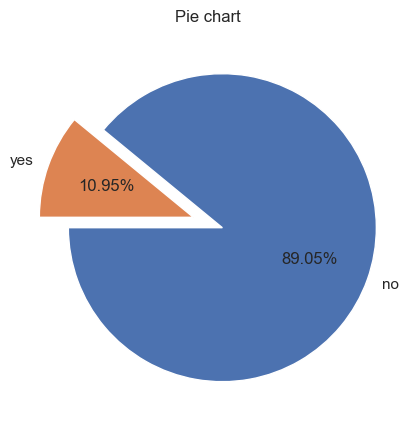

In [90]:
plt.figure(figsize=(8, 5))
plt.title("Pie chart")
plt.pie(values,
       explode=[0.1, 0.1], 
       labels=keys,       
       autopct="%0.2f%%",
       startangle=180,
       radius=1)

In [91]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

# Age

In [92]:
bank_df['age'].unique()

array([30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55,
       40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)

In [93]:
bank_df['age'].nunique()

67

In [94]:
bank_df['age'].value_counts()

age
32    216
31    191
30    177
34    174
35    172
     ... 
69      2
70      2
85      1
88      1
19      1
Name: count, Length: 67, dtype: int64

In [95]:
adf=bank_df['age'].value_counts()
keys=adf.keys()
values=ydf.values
keys,values


(Index([32, 31, 30, 34, 35, 33, 36, 38, 41, 29, 37, 39, 42, 43, 28, 47, 45, 40,
        46, 44, 54, 27, 48, 50, 49, 53, 51, 52, 56, 55, 58, 26, 57, 25, 24, 59,
        60, 23, 22, 21, 61, 66, 62, 71, 64, 63, 20, 67, 80, 76, 68, 65, 78, 18,
        74, 73, 81, 86, 77, 72, 82, 75, 69, 70, 85, 88, 19],
       dtype='int64', name='age'),
 array([3668,  451], dtype=int64))

In [96]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: ylabel='Frequency'>

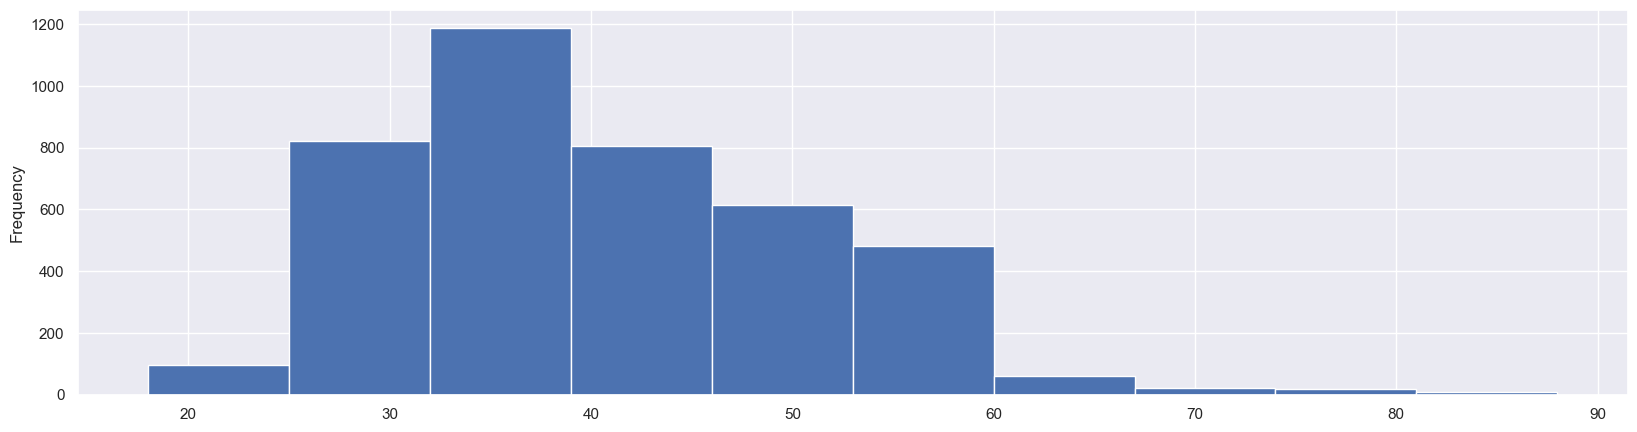

In [97]:
bank_df['age'].plot(kind='hist') 

In [98]:
bank_df['age'].skew()

0.715693979114355

<Axes: xlabel='age'>

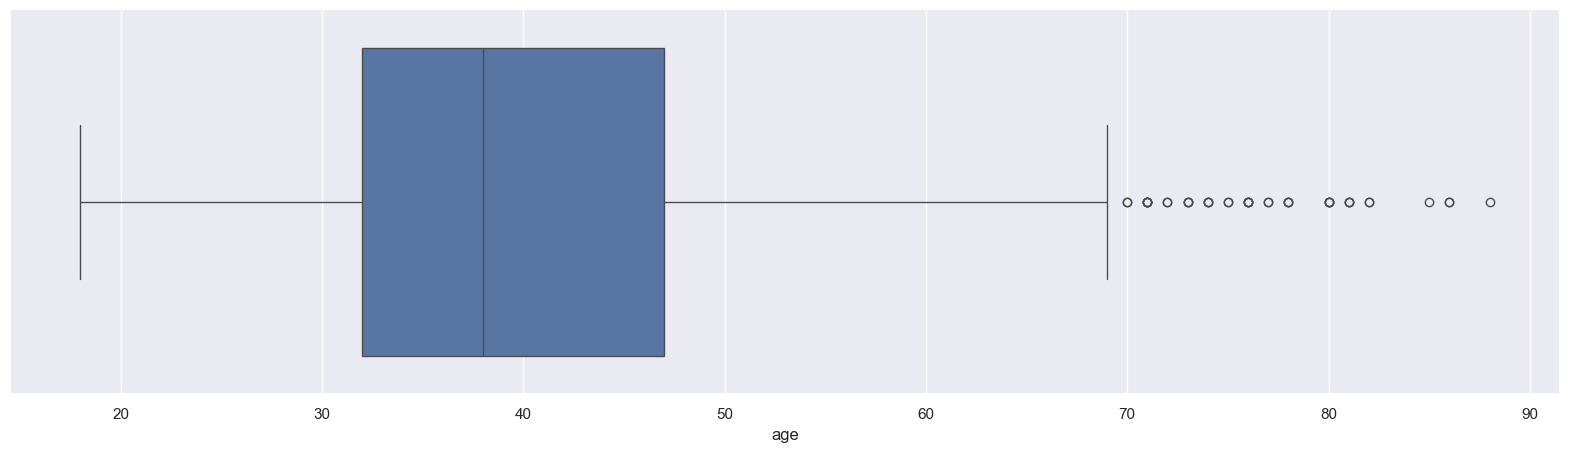

In [99]:
sns.boxplot(x='age',data=bank_df)

<Axes: ylabel='Frequency'>

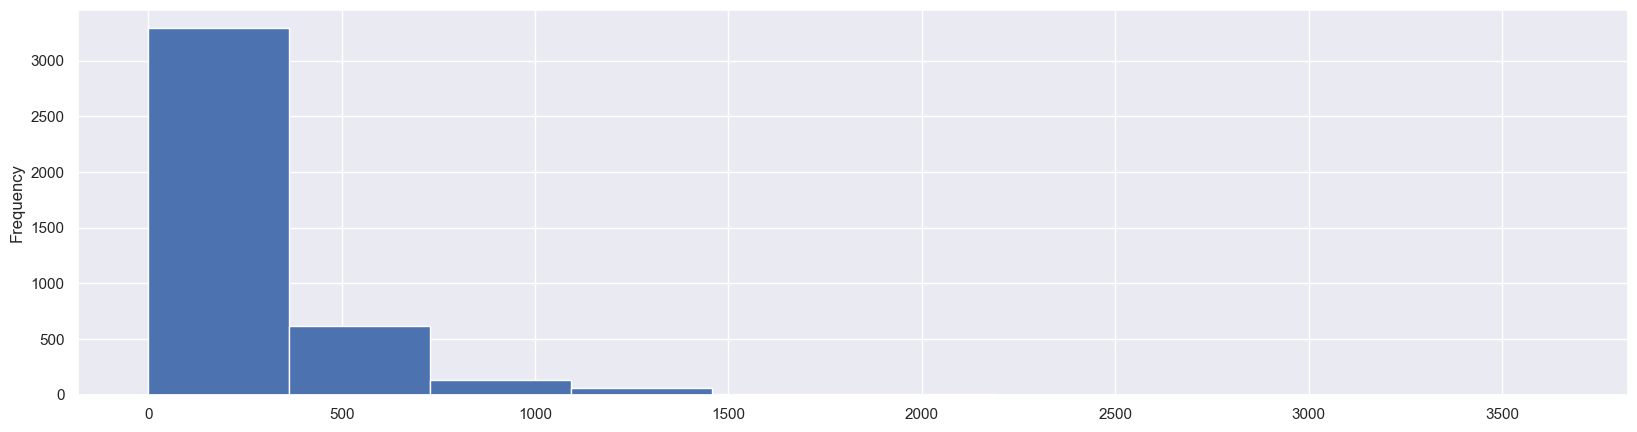

In [100]:
bank_df['duration'].plot(kind='hist') 

In [101]:
bank_df['duration'].skew()

3.294781322792845

<Axes: xlabel='duration'>

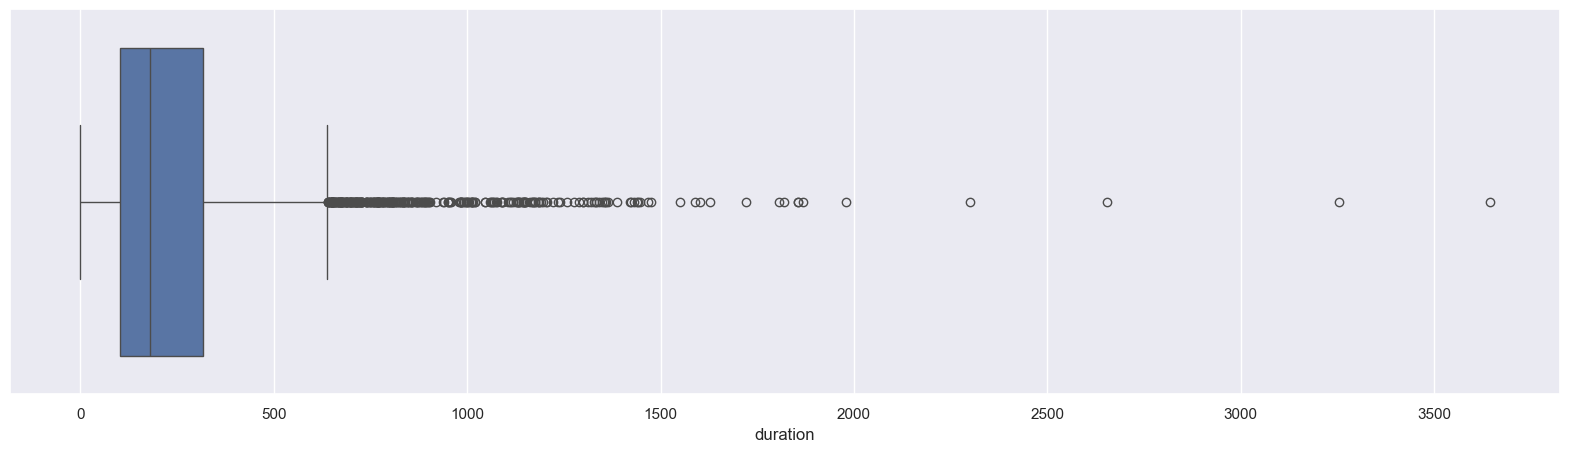

In [102]:
sns.boxplot(x='duration',data=bank_df)

<Axes: ylabel='Frequency'>

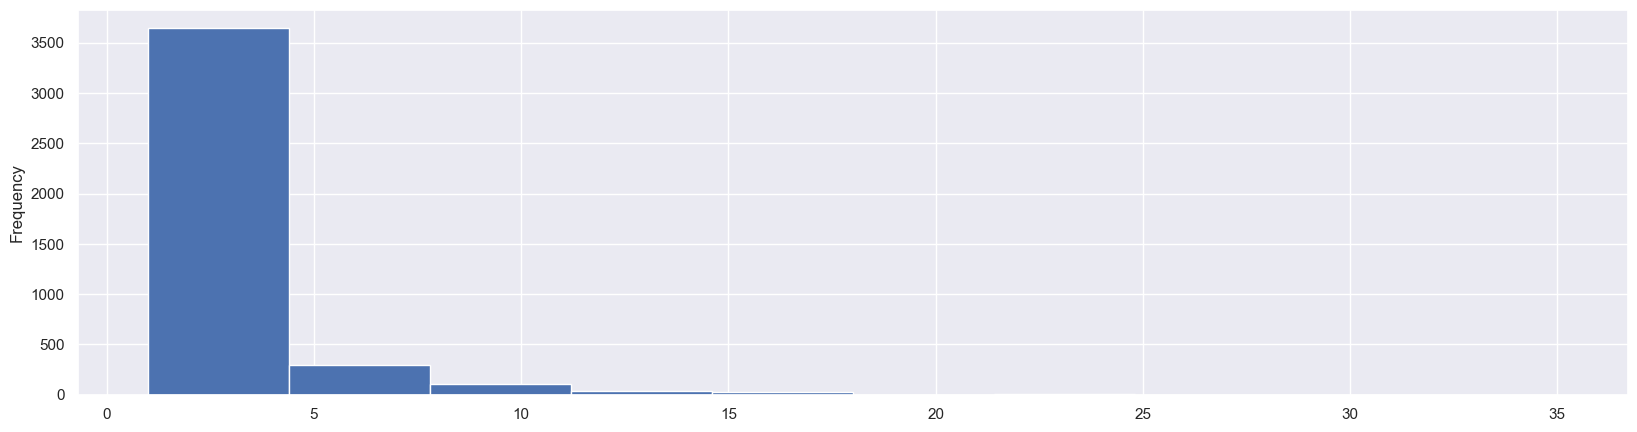

In [103]:
bank_df['campaign'].plot(kind='hist') 

In [104]:
bank_df['campaign'].skew()

4.003184952280664

<Axes: xlabel='campaign'>

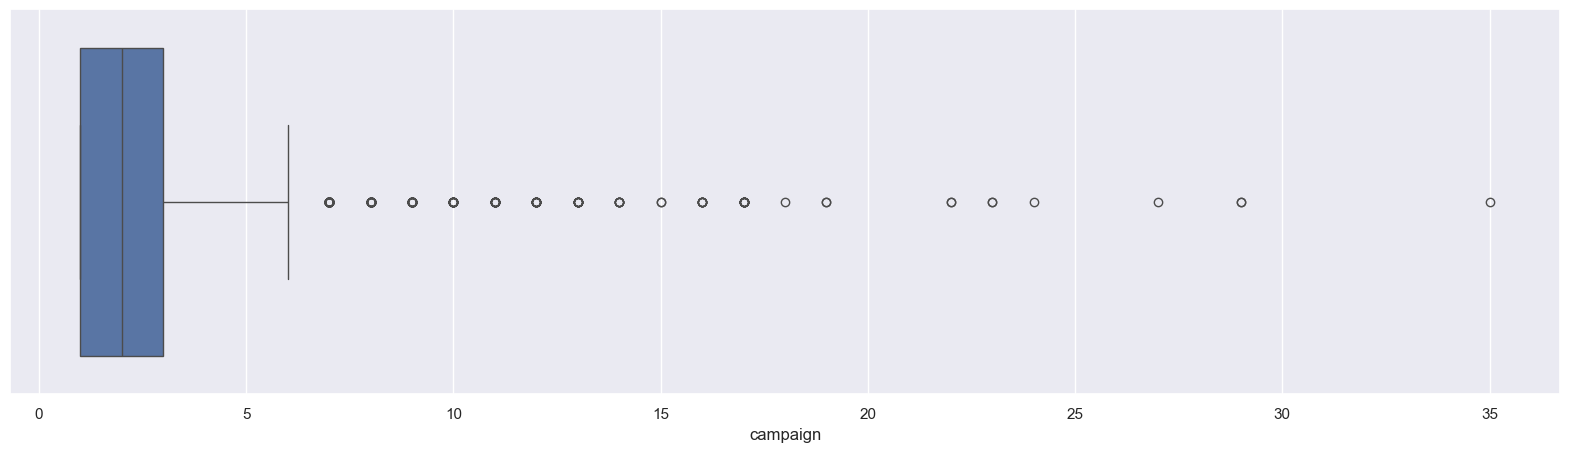

In [105]:
sns.boxplot(x='campaign',data=bank_df)

<Axes: ylabel='Frequency'>

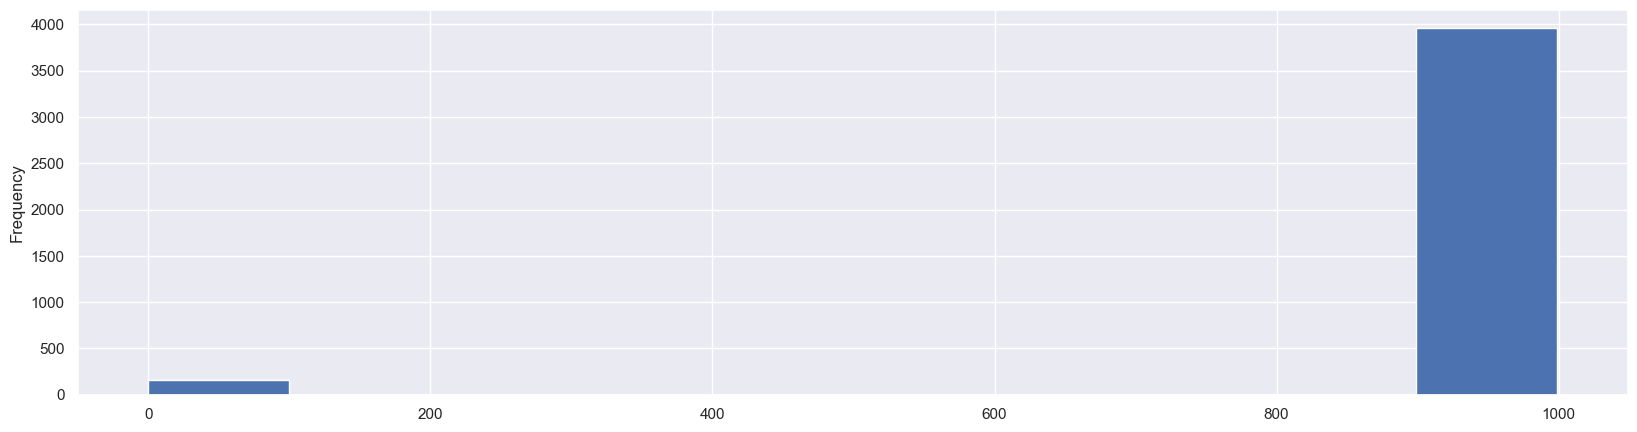

In [106]:
bank_df['pdays'].plot(kind='hist') 

In [107]:
bank_df['pdays'].skew()

-4.775139160988719

<Axes: xlabel='pdays'>

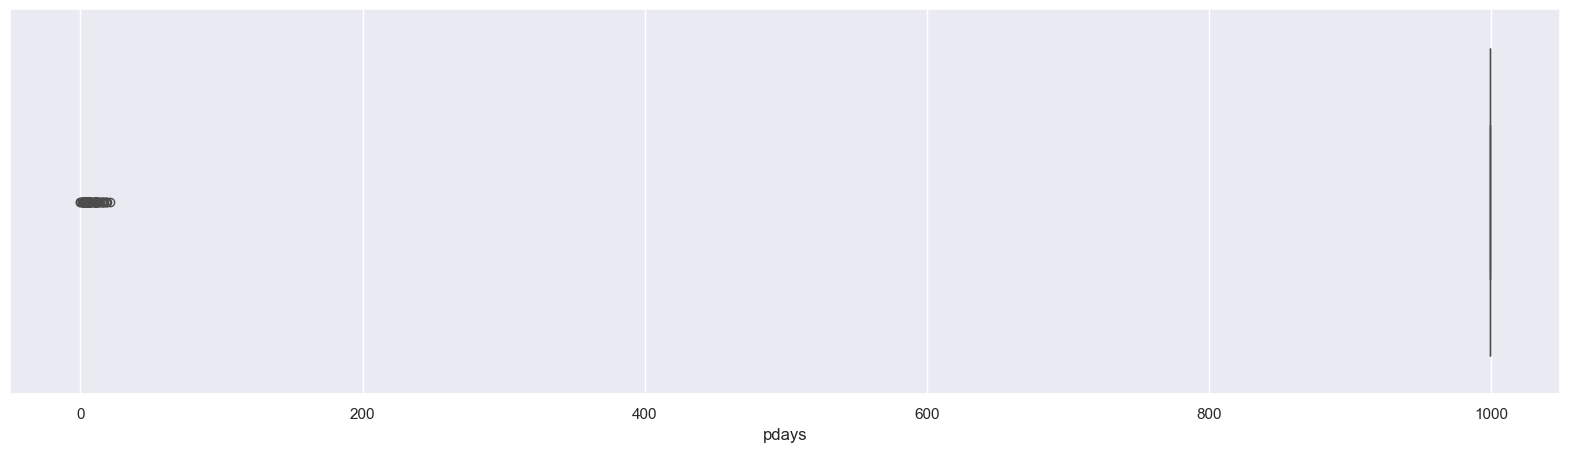

In [108]:
sns.boxplot(x='pdays',data=bank_df)

<Axes: ylabel='Frequency'>

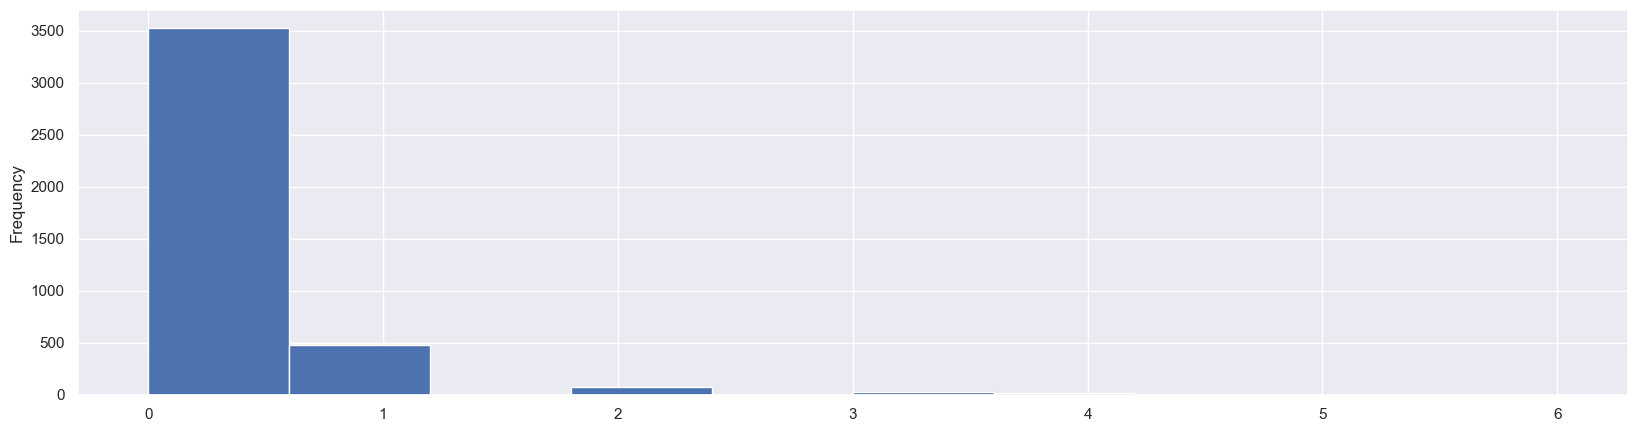

In [109]:
bank_df['previous'].plot(kind='hist') 

In [110]:
bank_df['previous'].skew()

4.022978833133894

<Axes: xlabel='previous'>

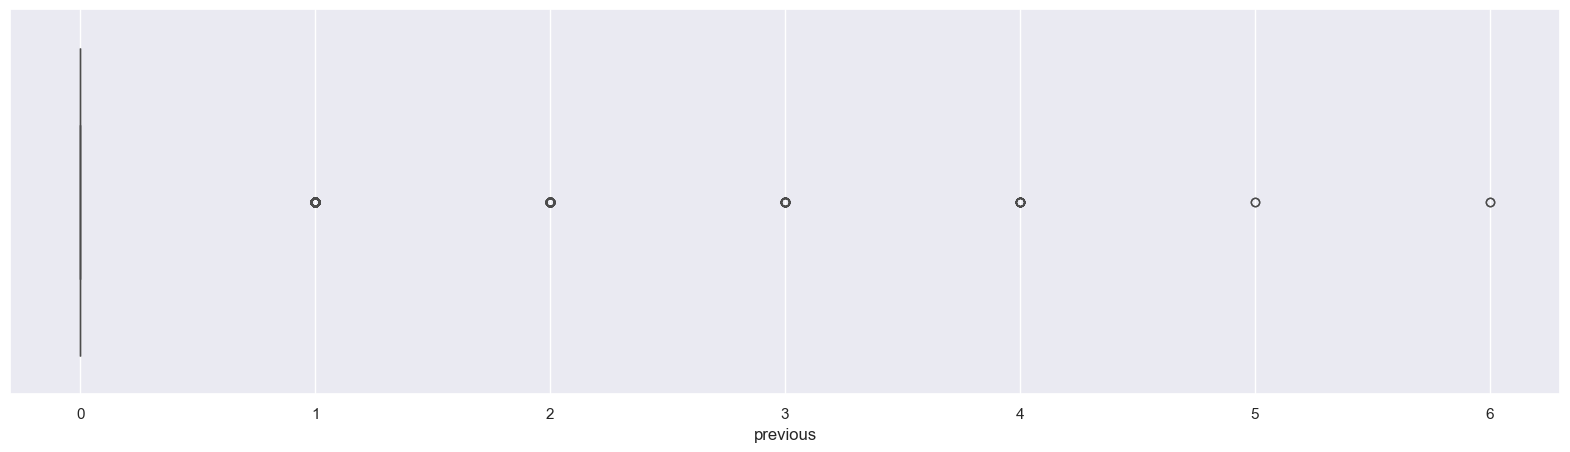

In [111]:
sns.boxplot(x='previous',data=bank_df)

<Axes: ylabel='Frequency'>

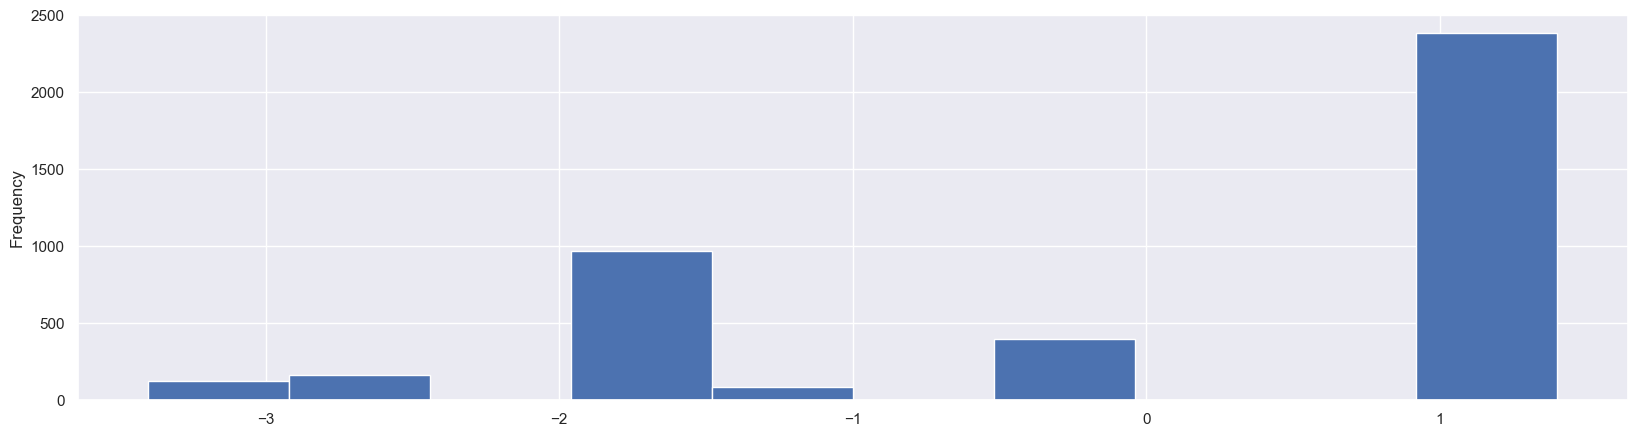

In [112]:
bank_df['emp.var.rate'].plot(kind='hist') 

In [113]:
bank_df['emp.var.rate'].skew()

-0.7276878781571737

<Axes: xlabel='emp.var.rate'>

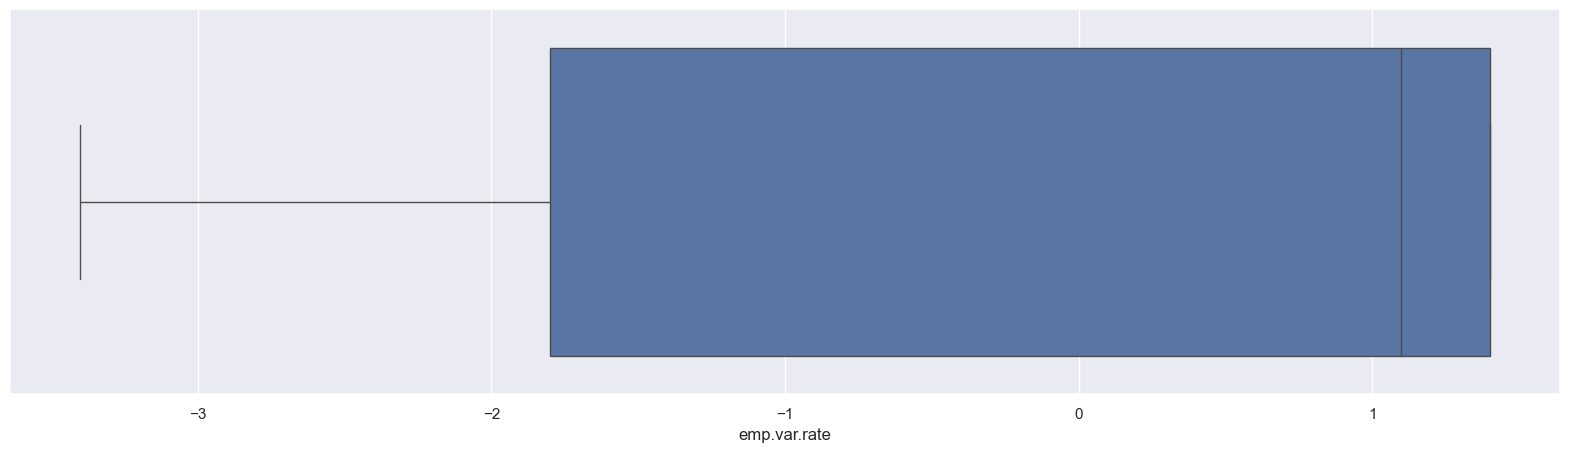

In [114]:
sns.boxplot(x='emp.var.rate',data=bank_df)

<Axes: ylabel='Frequency'>

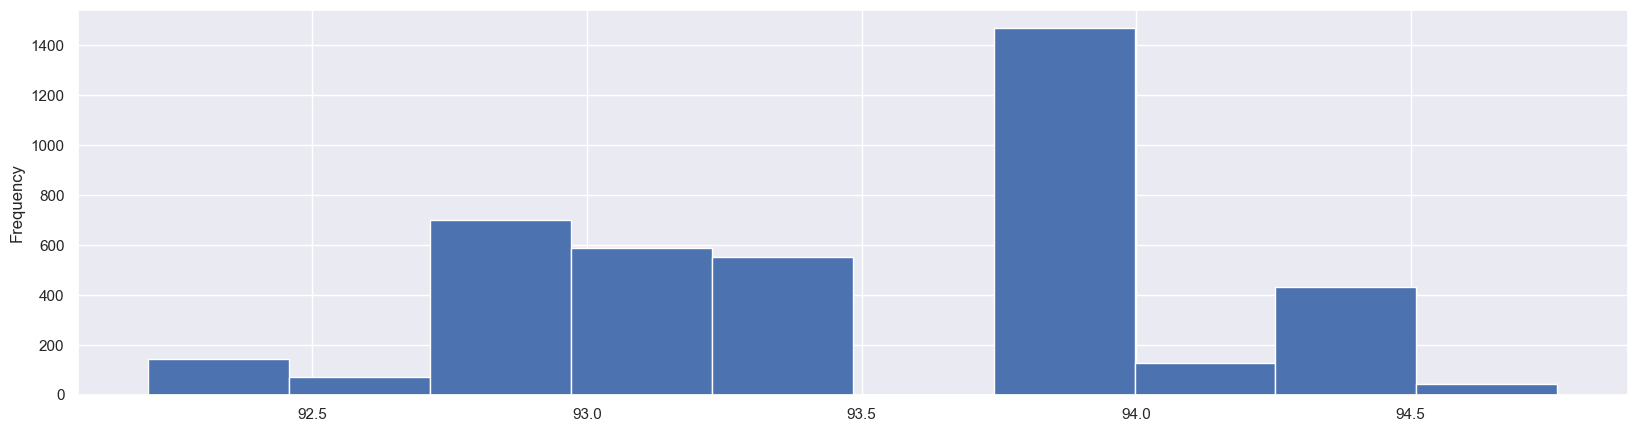

In [115]:
bank_df['cons.price.idx'].plot(kind='hist') 


In [116]:
bank_df['cons.price.idx'].skew()

-0.21664142168032088

<Axes: xlabel='cons.price.idx'>

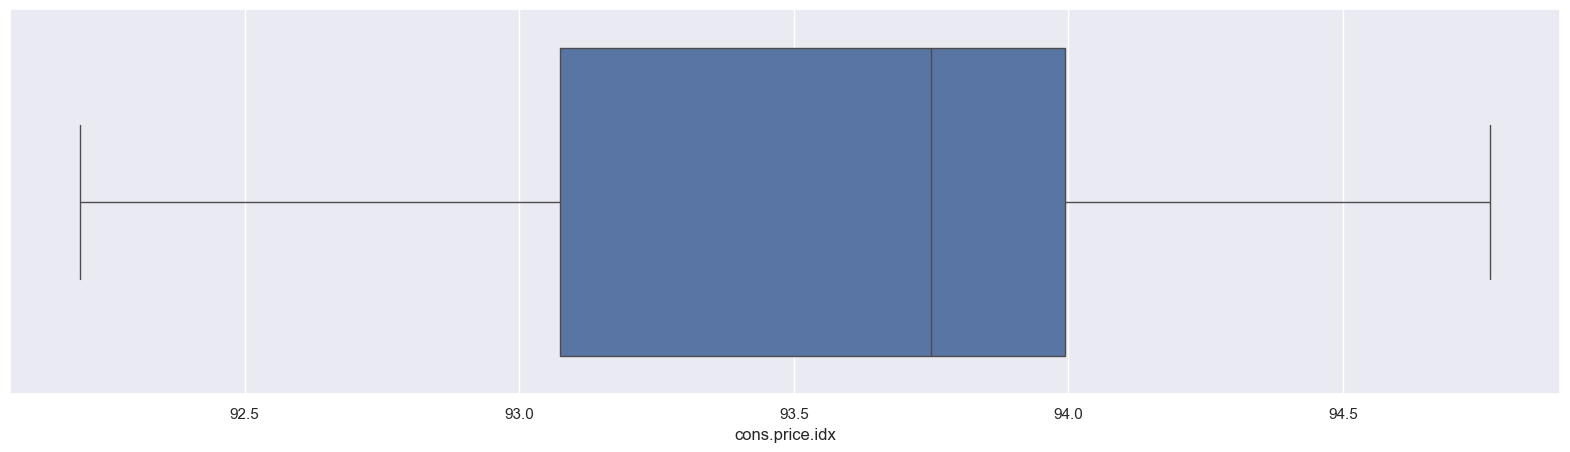

In [117]:

sns.boxplot(x='cons.price.idx',data=bank_df)

<Axes: ylabel='Frequency'>

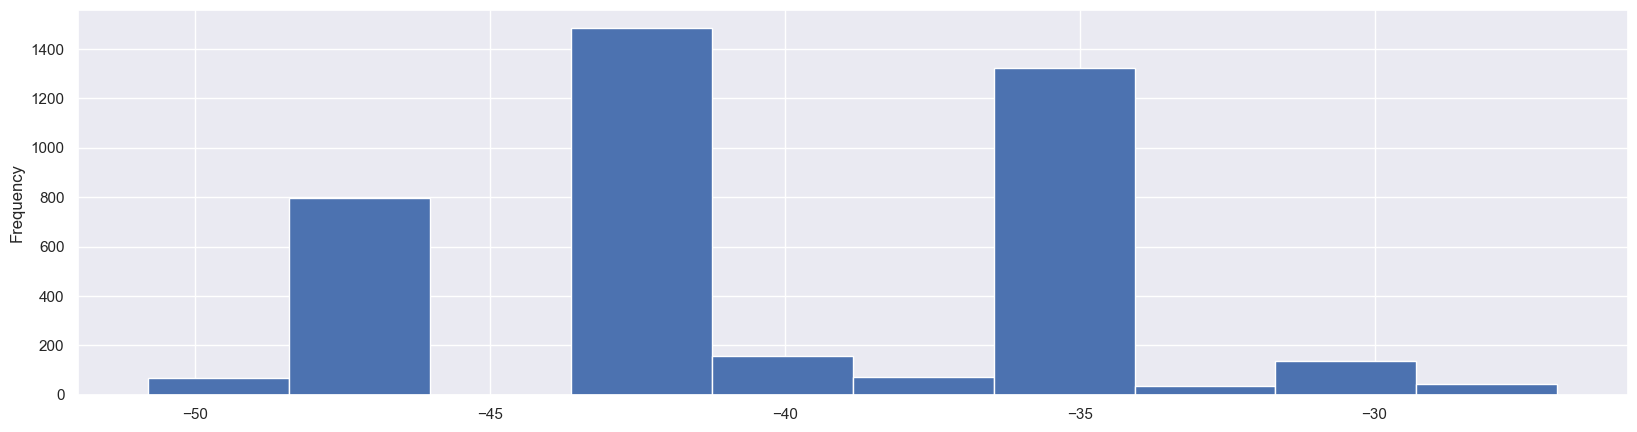

In [118]:
bank_df['cons.conf.idx'].plot(kind='hist') 

In [119]:
bank_df['cons.conf.idx'].skew()

0.2873090795653013

<Axes: xlabel='cons.conf.idx'>

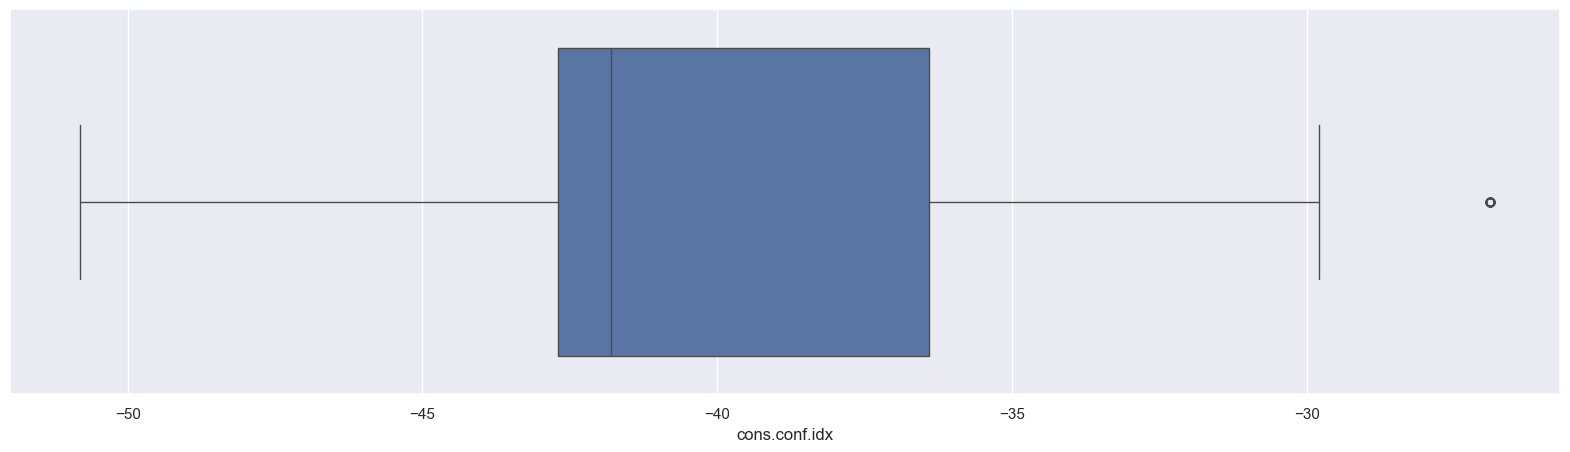

In [120]:
sns.boxplot(x='cons.conf.idx',data=bank_df)

<Axes: ylabel='Frequency'>

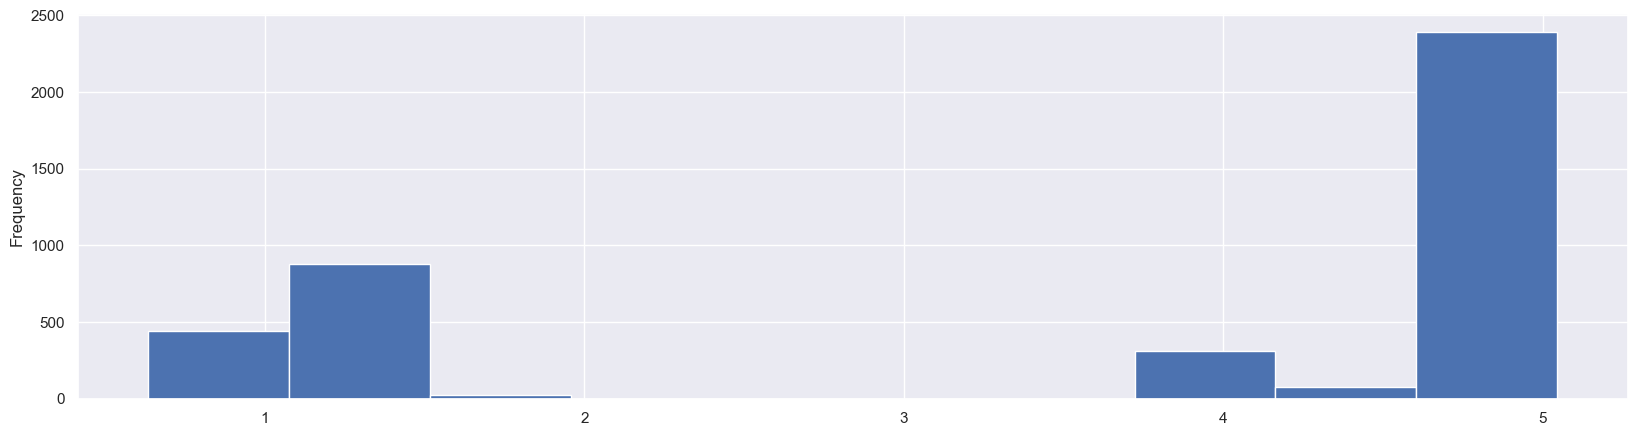

In [121]:
bank_df['euribor3m'].plot(kind='hist') 

In [122]:
bank_df['euribor3m'].skew()

-0.7150798684003519

<Axes: xlabel='euribor3m'>

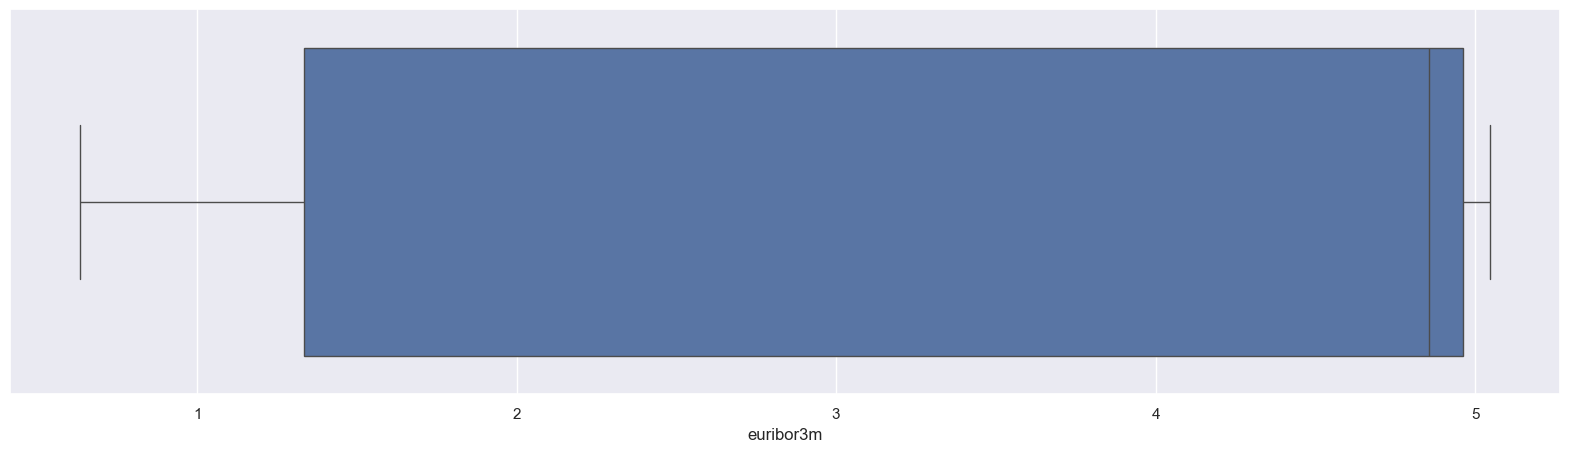

In [123]:
sns.boxplot(x='euribor3m',data=bank_df)

<Axes: ylabel='Frequency'>

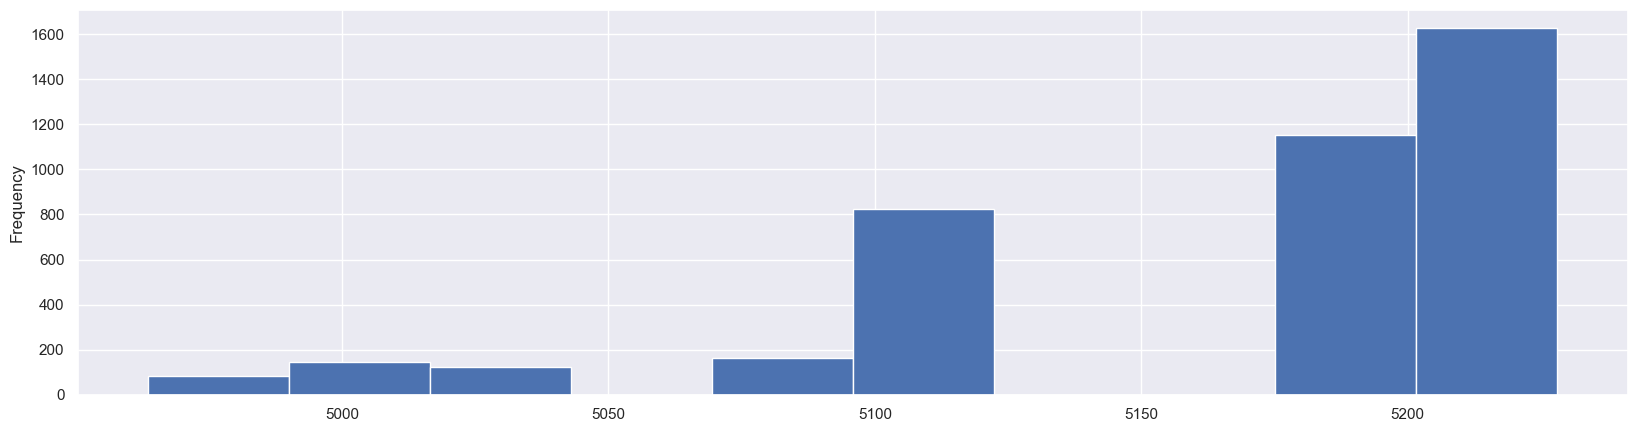

In [124]:
bank_df['nr.employed'].plot(kind='hist') 

In [125]:
bank_df['nr.employed'].skew()

-1.0758768878556768

<Axes: xlabel='nr.employed'>

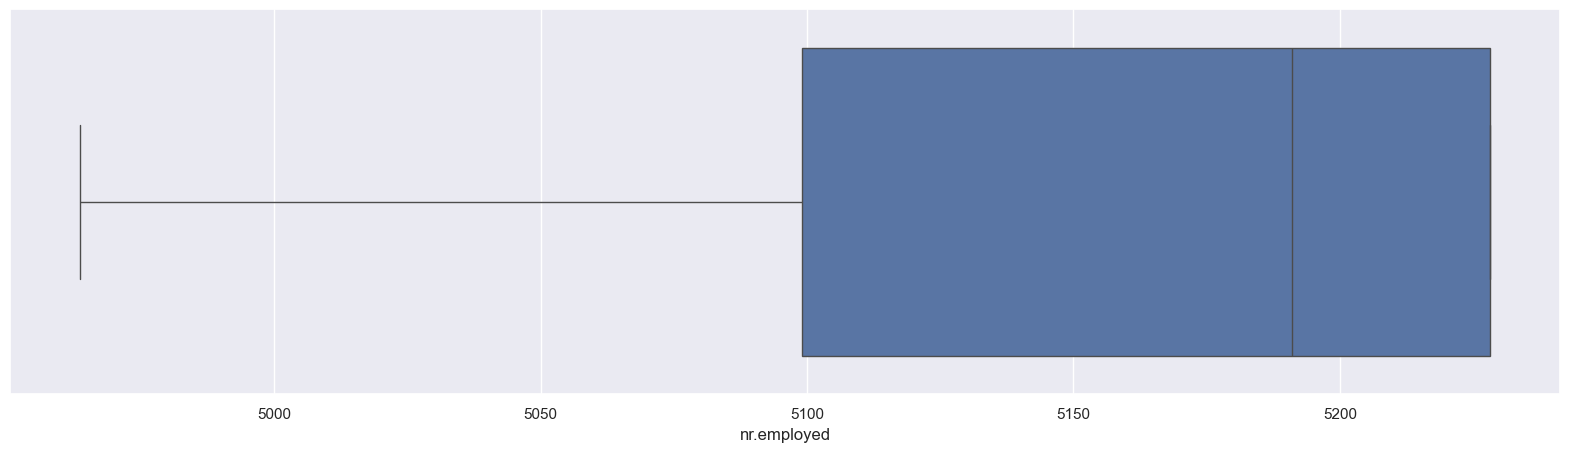

In [126]:
sns.boxplot(x='nr.employed',data=bank_df)

In [127]:
np.log1p(bank_df['age'])

0       3.433987
1       3.688879
2       3.258097
3       3.663562
4       3.871201
          ...   
4114    3.433987
4115    3.688879
4116    3.332205
4117    4.077537
4118    3.555348
Name: age, Length: 4119, dtype: float64

<Axes: xlabel='age'>

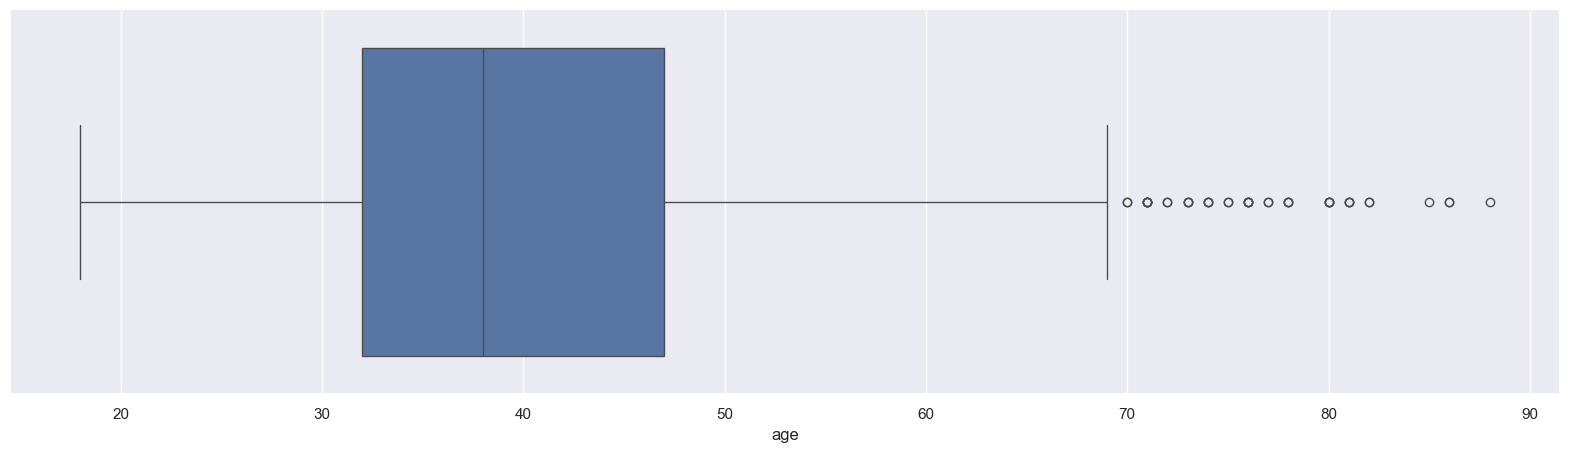

In [132]:
sns.boxplot(
            x='age',
            data=bank_df) 
